In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

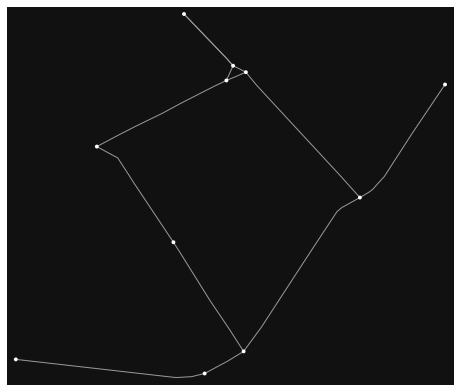

11
13


In [12]:
G_drive = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'drive')
ox.plot_graph(G_drive)
print(len(G_drive.nodes))
print(len(G_drive.edges))

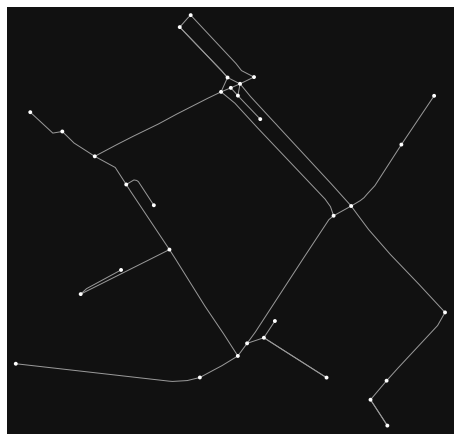

32
39


In [13]:
G_bike = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'bike')
ox.plot_graph(G_bike)
print(len(G_bike.nodes))
print(len(G_bike.edges))

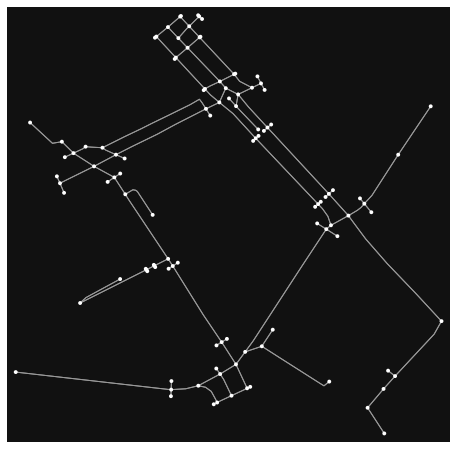

109
242


In [14]:
G_walk = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'walk')
ox.plot_graph(G_walk)
print(len(G_walk.nodes))
print(len(G_walk.edges))

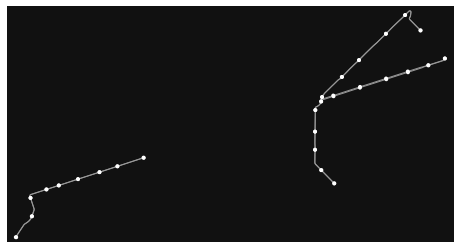

54
50


In [11]:
G_tram = ox.load_graphml("../BCNgraphs/tram.graphml")
ox.plot_graph(G_tram)
print(len(G_tram.nodes))
print(len(G_tram.edges))

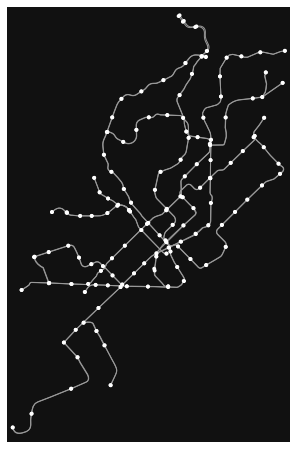

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
G_subway = ox.load_graphml("../BCNgraphs/subway.graphml")
ox.plot_graph(G_subway)

# Join the graphs

In [16]:
nx.compose_all?

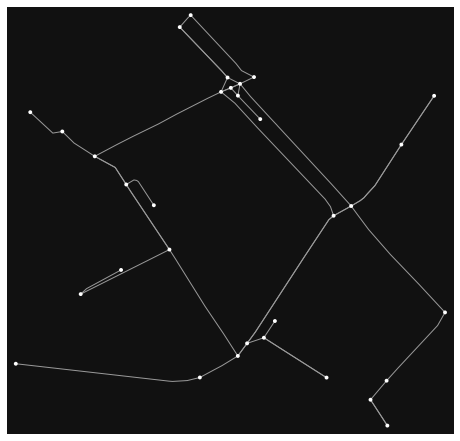

32
43


In [83]:
G_union = nx.compose(G_drive,G_bike)
ox.plot_graph(G_union)
print(len(G_union.nodes))
print(len(G_union.edges))

In [84]:
nodes, edges = ox.graph_to_gdfs(G_union)
nodes

,y,x,osmid,geometry
26057116,41.385749,2.170134,26057116,POINT (2.17013 41.38575)
26057125,41.387392,2.168565,26057125,POINT (2.16857 41.38739)
71710260,41.387890,2.172287,71710260,POINT (2.17229 41.38789)
104431832,41.385572,2.169718,104431832,POINT (2.16972 41.38557)
112382699,41.385685,2.167699,112382699,POINT (2.16770 41.38569)
216350784,41.386983,2.171378,216350784,POINT (2.17138 41.38698)
344992884,41.388455,2.169497,344992884,POINT (2.16950 41.38846)
1126640615,41.386625,2.169384,1126640615,POINT (2.16938 41.38662)
1362900007,41.387923,2.169951,1362900007,POINT (2.16995 41.38792)
1400442246,41.388041,2.170021,1400442246,POINT (2.17002 41.38804)


In [85]:
edges

,osmid,oneway,lanes,name,highway,maxspeed,length,width,geometry,access,service,u,v,key
0,"[20355312, 545937949, 140001534]",True,"[5, 1, 6]",Plaça de Catalunya,secondary,50,174.011,12,"LINESTRING (2.17013 41.38575, 2.17024 41.38585...",NaN,NaN,26057116,216350784,0
1,"[126304603, 603022119]",True,NaN,Plaça de Catalunya,secondary,50,115.733,NaN,"LINESTRING (2.17013 41.38575, 2.17000 41.38590...",NaN,NaN,26057116,1126640615,0
2,20355312,True,5,Plaça de Catalunya,secondary,50,14.315,NaN,"LINESTRING (2.17013 41.38575, 2.17024 41.38585)",NaN,NaN,26057116,2853451267,0
3,251733667,True,1,Carrer de Pelai,secondary,50,39.955,12,"LINESTRING (2.16972 41.38557, 2.16988 41.38564...",NaN,NaN,104431832,26057116,0
4,68506242,True,3,Carrer de Pelai,secondary,50,169.707,14,"LINESTRING (2.16770 41.38569, 2.16938 41.38554...",NaN,NaN,112382699,104431832,0
5,"[20045755, 295263590, 295263591]",True,NaN,Plaça de Catalunya,secondary,50,151.175,NaN,"LINESTRING (2.17138 41.38698, 2.17120 41.38713...",NaN,NaN,216350784,2494469623,0
6,140001504,True,2,Carrer de Fontanella,secondary,50,127.337,6,"LINESTRING (2.17138 41.38698, 2.17148 41.38703...",NaN,NaN,216350784,71710260,0
7,140001504,True,2,Carrer de Fontanella,secondary,50,73.582,6,"LINESTRING (2.17138 41.38698, 2.17148 41.38703...",NaN,NaN,216350784,71710262,0
8,663272026,True,NaN,Avinguda del Portal de l'Àngel,pedestrian,NaN,129.946,NaN,"LINESTRING (2.17138 41.38698, 2.17144 41.38692...",delivery,NaN,216350784,3497460957,0
9,"[295263587, 315739558]",False,NaN,Passeig de Gràcia,"[secondary, tertiary]","[30, 50]",63.571,NaN,"LINESTRING (2.16950 41.38846, 2.16960 41.38838...",NaN,NaN,344992884,1400442246,0


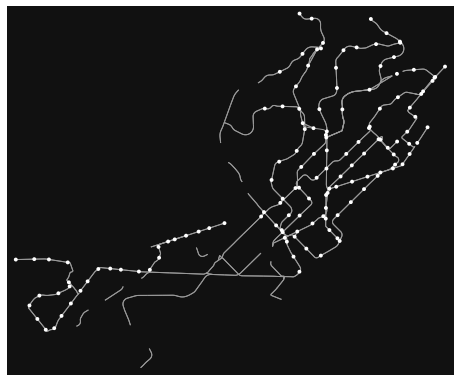

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [14]:
G_union = ox.consolidate_intersections((G_union), rebuild_graph=True, tolerance=15, dead_ends=False)
ox.plot_graph(G_union)

In [15]:
print(len(G_union.nodes))
print(len(G_union.edges))

139
404


In [155]:
union_nodes, union_edges = ox.graph_to_gdfs(G_union)
union_edges.dropna(axis=1, how='any') 
#union_edges.loc[union_edges['highway']=='living_street']

,osmid,oneway,highway,length,geometry,u_original,v_original,u,v,key
0,173769630,True,residential,109.649251,"LINESTRING (431371.542 4581068.350, 431398.827...",190993191,30252172,0,25,0
1,173769630,False,residential,67.591739,"LINESTRING (431371.542 4581068.350, 431355.986...",1845261211,30252172,0,25,1
2,246640824,False,secondary,79.473503,"LINESTRING (431371.542 4581068.350, 431398.827...",190993191,4182135650,0,29,0
3,416454322,False,pedestrian,90.688844,"LINESTRING (431371.542 4581068.350, 431355.986...",1845261211,30252189,0,33,0
4,18510288,False,secondary,201.361421,"LINESTRING (431371.542 4581068.350, 431408.393...",1401457839,1401457869,0,38-1,0
...,...,...,...,...,...,...,...,...,...,...
3155,"[305108017, 4809711]",False,"[residential, pedestrian]",118.965038,"LINESTRING (430277.038 4581226.256, 430279.497...",30884291,7042287292,71-0,92,0
3156,246638752,False,residential,65.139983,"LINESTRING (430277.038 4581226.256, 430256.035...",2560076882,3096906055,71-0,66-1,0
3157,241867923,False,pedestrian,128.129473,"LINESTRING (430277.038 4581226.256, 430256.035...",2560076882,30647873,71-0,18,0
3158,246638752,False,residential,80.240742,"LINESTRING (430277.038 4581226.256, 430293.157...",7042178682,7042178676,71-0,67,0


## Routing 

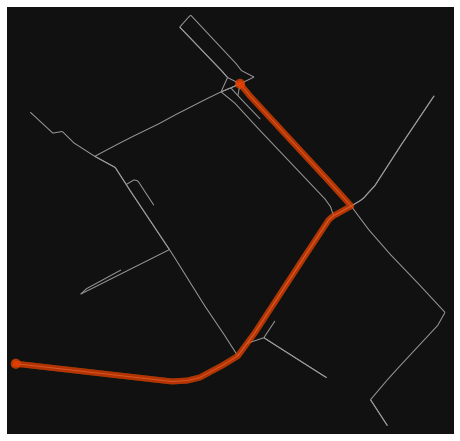

from 112382699 path to 2494469623


In [88]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G_union)[randint(0,len(G_union)-1)]
dest = list(G_union)[randint(0,len(G_union)-1)]
try:
    route1 = ox.shortest_path(G_union, orig,dest, weight='length')
    route2 = ox.shortest_path(G_union, orig,dest, weight='travel_time')
    # plot the routes
    fig, ax = ox.plot_graph_routes(G_union, routes=[route1, route2], route_colors=['y', 'r'],
                               route_linewidth=6, node_size=0)
    print("from {} path to {}".format(orig, dest))
except:
    print("from {} no path to {}".format(orig, dest))